In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
trainy.shape

(60000,)

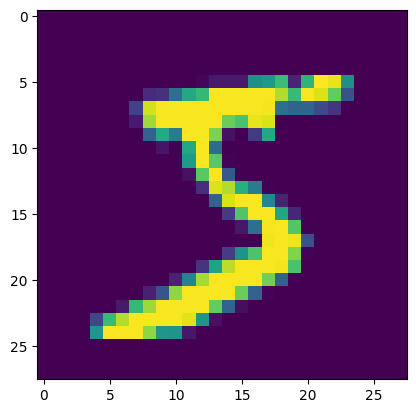

In [5]:
plt.imshow(trainX[0])

In [6]:
train_images = trainX/255
test_images = testX/255

In [7]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [8]:
dataset_images

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [9]:
dataset_labels = tf.data.Dataset.from_tensor_slices(trainy)

In [10]:
dataset_labels

<TensorSliceDataset shapes: (), types: tf.uint8>

In [11]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [12]:
dataset

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [13]:
batch_size = 256
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

# L1, L2 test

In [14]:
model_dense_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model_dense_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
steps_per_epoch = train_images.shape[0]/batch_size

In [17]:
history_dense_0 = model_dense_0.fit(dataset, 
                                    epochs=20, 
                                    steps_per_epoch=steps_per_epoch, 
                                   validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 3s 12ms/step - loss: 0.3057 - accuracy: 0.9090 - val_loss: 19.6303 - val_accuracy: 0.9605
Epoch 2/20
235/234 [==============================] - 3s 11ms/step - loss: 0.0946 - accuracy: 0.9711 - val_loss: 16.4351 - val_accuracy: 0.9678
Epoch 3/20
235/234 [==============================] - 3s 12ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 15.4440 - val_accuracy: 0.9754
Epoch 4/20
235/234 [==============================] - 3s 12ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 15.5880 - val_accuracy: 0.9754
Epoch 5/20
235/234 [==============================] - 3s 12ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 17.2303 - val_accuracy: 0.9752
Epoch 6/20
235/234 [==============================] - 3s 13ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 21.7191 - val_accuracy: 0.9752
Epoch 7/20
235/234 [==============================] - 3s 13ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 17.2287 - val_accuracy:

In [18]:
print(history_dense_0.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
# model_dense_1 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
model_dense_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model_dense_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [21]:
history_dense_1 = model_dense_1.fit(dataset, epochs=20, 
                                    steps_per_epoch=steps_per_epoch, 
                                    validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 7s 29ms/step - loss: 1.6227 - accuracy: 0.9122 - val_loss: 17.1713 - val_accuracy: 0.9642
Epoch 2/20
235/234 [==============================] - 7s 30ms/step - loss: 0.4458 - accuracy: 0.9727 - val_loss: 11.6307 - val_accuracy: 0.9740
Epoch 3/20
235/234 [==============================] - 7s 28ms/step - loss: 0.2115 - accuracy: 0.9813 - val_loss: 13.8448 - val_accuracy: 0.9740
Epoch 4/20
235/234 [==============================] - 7s 30ms/step - loss: 0.1327 - accuracy: 0.9855 - val_loss: 10.9286 - val_accuracy: 0.9802
Epoch 5/20
235/234 [==============================] - 7s 31ms/step - loss: 0.0928 - accuracy: 0.9883 - val_loss: 13.4728 - val_accuracy: 0.9769
Epoch 6/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0689 - accuracy: 0.9919 - val_loss: 14.0935 - val_accuracy: 0.9794
Epoch 7/20
235/234 [==============================] - 7s 31ms/step - loss: 0.0592 - accuracy: 0.9918 - val_loss: 15.4373 - val_accuracy:

In [22]:
print(history_dense_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
model_dense_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model_dense_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [25]:
history_dense_2 = model_dense_2.fit(dataset, epochs=20, 
                                    steps_per_epoch=steps_per_epoch, 
                                    validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 8s 32ms/step - loss: 0.5596 - accuracy: 0.8962 - val_loss: 20.1087 - val_accuracy: 0.9616
Epoch 2/20
235/234 [==============================] - 8s 32ms/step - loss: 0.2031 - accuracy: 0.9692 - val_loss: 12.2984 - val_accuracy: 0.9734
Epoch 3/20
235/234 [==============================] - 7s 32ms/step - loss: 0.1330 - accuracy: 0.9803 - val_loss: 15.8900 - val_accuracy: 0.9725
Epoch 4/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0949 - accuracy: 0.9856 - val_loss: 14.1544 - val_accuracy: 0.9737
Epoch 5/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0678 - accuracy: 0.9892 - val_loss: 12.9747 - val_accuracy: 0.9809
Epoch 6/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0518 - accuracy: 0.9917 - val_loss: 14.6547 - val_accuracy: 0.9788
Epoch 7/20
235/234 [==============================] - 7s 31ms/step - loss: 0.0432 - accuracy: 0.9923 - val_loss: 12.1261 - val_accuracy:

In [26]:
print(history_dense_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


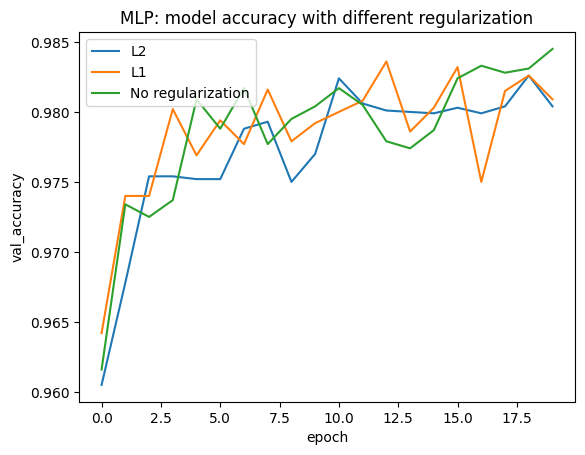

In [27]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['val_accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

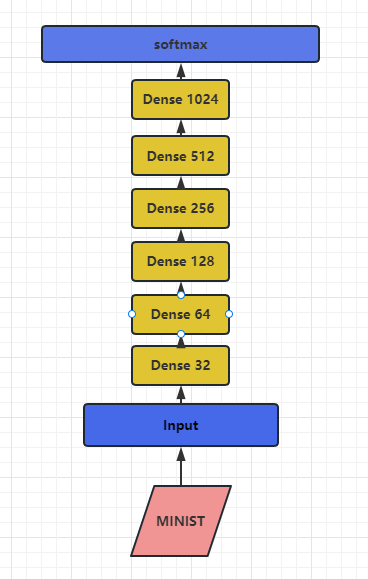

# Dropout test

In [28]:
model_dense_2_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1,noise_shape=None,seed=None),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model_dense_2_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [30]:
history_dense_2_drop = model_dense_2_drop.fit(dataset, epochs=20,
                                              steps_per_epoch=steps_per_epoch,
                                              validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 8s 34ms/step - loss: 0.3578 - accuracy: 0.8961 - val_loss: 18.0883 - val_accuracy: 0.9639
Epoch 2/20
235/234 [==============================] - 8s 33ms/step - loss: 0.1131 - accuracy: 0.9681 - val_loss: 15.8128 - val_accuracy: 0.9733
Epoch 3/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0738 - accuracy: 0.9787 - val_loss: 11.7931 - val_accuracy: 0.9792
Epoch 4/20
235/234 [==============================] - 7s 31ms/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 17.6408 - val_accuracy: 0.9739
Epoch 5/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 17.6689 - val_accuracy: 0.9773
Epoch 6/20
235/234 [==============================] - 7s 32ms/step - loss: 0.0347 - accuracy: 0.9901 - val_loss: 19.0655 - val_accuracy: 0.9754
Epoch 7/20
235/234 [==============================] - 7s 31ms/step - loss: 0.0336 - accuracy: 0.9902 - val_loss: 17.0953 - val_accuracy:

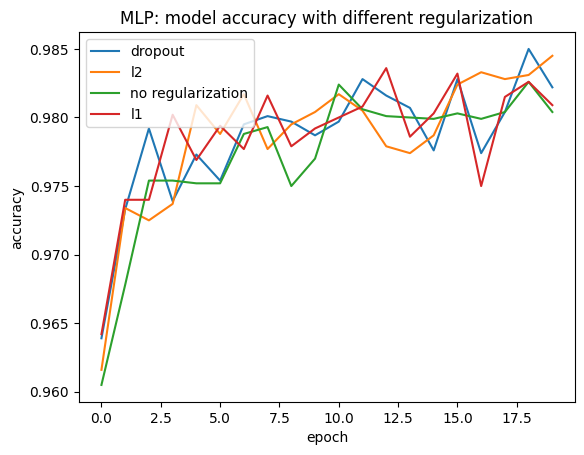

In [31]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2_drop.history['val_accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.plot(history_dense_0.history['val_accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout', 'l2', 'no regularization', 'l1'], loc='upper left')
plt.show()